In [3]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [21]:
df = pd.read_csv("Mall_Customers.csv")
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [7]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

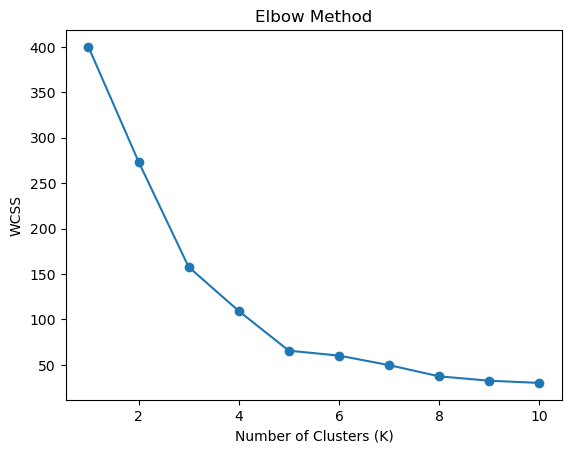

In [13]:
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [15]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
labels = kmeans.fit_predict(X_scaled)
df['Cluster'] = labels

In [17]:
score = silhouette_score(X_scaled, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.5546571631111091


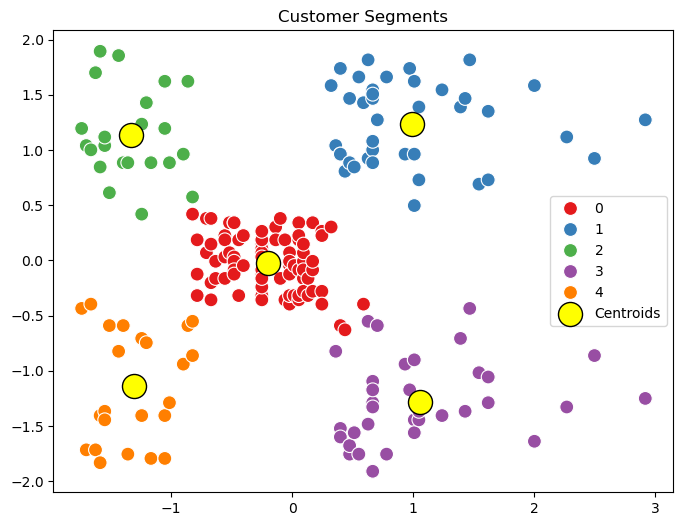

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=labels, palette='Set1', s=100)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            s=300, c='yellow', label='Centroids', edgecolor='black')
plt.title('Customer Segments')
plt.legend()
plt.show()